# Matching people
Contents:
- User recommendation - recommender system for matching users with 10 others based on their interest registered through the questionaire registration form. (almost done - needs updating and a check)
- Data visualisation - view for user to aid understanding of their match percentage and their shared top interests. (done)

# - User recommendation
In this section, we use collaborative filtering to recommend users to other users based on the similarity of their interests.

In [1]:
# import necessary packages
import pandas as pd
import numpy as np

In [2]:
# Read the  data and store as a Pandas dateframe
df = pd.read_csv("TA_PreData.csv")

In [3]:
df.describe()

,Dancing,Singing,Writing,Meditation,Playing games,Active sports,Being creative,Acting,Cooking,Gardening,...,Daily events,Celebrities,Science and technology,Future goals,Sharing my past,Dreams,Loneliness,Health,Mental wellbeing,Life struggles
count,1007.000000,1009.000000,1004.000000,995.000000,1006.000000,1006.000000,1004.000000,1002.000000,1007.000000,1003.000000,...,1003.000000,1008.000000,1004.000000,1007.000000,1008.000000,1010.000000,1009.000000,1009.000000,1006.000000,1007.000000
mean,2.461768,2.324083,1.901394,3.387940,4.557654,3.291252,2.589641,3.024950,3.031778,1.907278,...,3.074776,2.362103,3.234064,3.414101,2.952381,3.297030,2.887017,3.250743,3.258449,3.031778
std,1.450399,1.512850,1.287736,1.405027,0.737183,1.504111,1.322002,1.325375,0.936865,1.175421,...,1.118432,1.270251,1.282599,1.136910,1.278387,0.683148,1.131757,1.075319,1.044675,1.374644
min,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,4.000000,2.000000,1.000000,2.000000,3.000000,1.000000,...,2.000000,1.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000
50%,2.000000,2.000000,1.000000,3.000000,5.000000,3.000000,2.000000,3.000000,3.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000,...,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [4]:
df.head()

,Name,Dancing,Singing,Writing,Meditation,Playing games,Active sports,Being creative,Acting,Cooking,...,Daily events,Celebrities,Science and technology,Future goals,Sharing my past,Dreams,Loneliness,Health,Mental wellbeing,Life struggles
0,Sally Abraham,3.0,3.0,2.0,1.0,5.0,5.0,1.0,2.0,4.0,...,2.0,1.0,4.0,2.0,1.0,4.0,3.0,1.0,3.0,1.0
1,Rebecca Acheson,1.0,1.0,1.0,1.0,4.0,1.0,2.0,2.0,3.0,...,3.0,2.0,3.0,4.0,4.0,3.0,2.0,4.0,4.0,1.0
2,Carole Ackland,5.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,3.0,...,1.0,1.0,2.0,5.0,5.0,1.0,5.0,2.0,4.0,4.0
3,Hayley Alderton,1.0,1.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,...,4.0,2.0,3.0,3.0,5.0,3.0,5.0,1.0,5.0,3.0
4,Nicola Allison,1.0,3.0,1.0,3.0,4.0,1.0,1.0,2.0,4.0,...,3.0,3.0,3.0,5.0,4.0,3.0,3.0,3.0,2.0,2.0


Let's create a dataset without the names for ease of data analysis.

In [5]:
df_noname = df.iloc[:,1:]

The dataset has a number of NaN entries, where questionnaire participants did not answer a particular question. Let's see what proportion of the entries are NaN.

In [6]:
df_noname.isnull().sum().sum()/(df_noname.shape[0]*df_noname.shape[1])

0.004356435643564357

The proportion of unanswered questions is small, so we should be able to use all the people for the recommender system by filling in the missing values with the mean of that user's scores. Before we do that, let's centre each row, so that the every user's mean score is 0. 

In [7]:
#Centre each row
df_noname = df_noname.sub(df_noname.mean(axis=1), axis=0)

In [8]:
# fill nans with 0.0 (mean of centred rows)
df_noname = df_noname.fillna(0.)

Now we can start building a recommender system. We use a k-nearest neighbor algorithm that calculate the "distance" between each person based on their scores given to each interest. The people who are "closest" to a person A are person A's matches.

For this, we need a suitable notion of "distance". We'll use the "cosine distance" for this as the angle between the people in the high-dimensiona lparameter space is important as well as the Euclidean distance between people.

The matches of person A are the people who have the minimum distance to person A.

In [9]:
from sklearn.neighbors import NearestNeighbors

# Number of closest neighbors to find
n_neighbors = 20

# make an object for the NearestNeighbors Class.
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=n_neighbors, n_jobs=-1)

# fit the dataset
model_knn.fit(df_noname)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                 radius=1.0)

Now find distances and indices in the dataframe of the nearest neighbors of each peron.

In [10]:
distances, indices = model_knn.kneighbors(df_noname)

In [11]:
distances

array([[0.        , 0.26587302, 0.31050719, ..., 0.39935084, 0.39987996,
        0.4092988 ],
       [0.        , 0.13352779, 0.16052451, ..., 0.28087146, 0.28148301,
        0.29049013],
       [0.        , 0.26248343, 0.28469536, ..., 0.42763644, 0.43004443,
        0.43007842],
       ...,
       [0.        , 0.23339605, 0.24115081, ..., 0.32712265, 0.32847482,
        0.32892977],
       [0.        , 0.21293541, 0.30965617, ..., 0.39988858, 0.40115266,
        0.40206925],
       [0.        , 0.24029555, 0.24128838, ..., 0.3030752 , 0.30522213,
        0.30791027]])

In [12]:
indices

array([[   0,  430,  348, ...,  580,  670,  830],
       [   1,  448,   47, ...,   84,  423,   42],
       [   2,  217,  262, ...,  155,  108,  133],
       ...,
       [1007,  200,  934, ...,  846,  935,  850],
       [1008,  407,  592, ...,  444,  272,  657],
       [1009,  818,  945, ...,  574,  852,  513]], dtype=int64)

The shortest distance between any two people in the dataframe can be found by:

In [13]:
distances[:,1].min()

0.010400718013760413

Let's find out which two people are closest.

In [14]:
np.where(distances == distances[:,1].min())

(array([449, 453], dtype=int64), array([1, 1], dtype=int64))

So it's the people with indices 449 and 453 in the dataframe. Their names are:

In [15]:
list(df.iloc[[449,453],:]['Name'])

['Fiona Henderson', 'Melanie Herring']

Let's check their interests to confirm that they match well.

In [16]:
df.iloc[[449,453],:]

,Name,Dancing,Singing,Writing,Meditation,Playing games,Active sports,Being creative,Acting,Cooking,...,Daily events,Celebrities,Science and technology,Future goals,Sharing my past,Dreams,Loneliness,Health,Mental wellbeing,Life struggles
449,Fiona Henderson,3.0,1.0,1.0,2.0,5.0,1.0,1.0,5.0,2.0,...,3.0,2.0,3.0,5.0,3.0,3.0,3.0,4.0,4.0,4.0
453,Melanie Herring,3.0,1.0,1.0,2.0,5.0,1.0,1.0,5.0,2.0,...,3.0,2.0,3.0,5.0,3.0,3.0,3.0,4.0,3.0,4.0


In [17]:
df.iloc[449,:] == df.iloc[453,:]

Name                      False
Dancing                    True
Singing                    True
Writing                    True
Meditation                 True
Playing games              True
Active sports              True
Being creative             True
Acting                     True
Cooking                    True
Gardening                  True
Pets                      False
Music                      True
Movies                     True
Reading                    True
Foreign languages          True
Daily events               True
Celebrities                True
Science and technology     True
Future goals               True
Sharing my past            True
Dreams                     True
Loneliness                 True
Health                     True
Mental wellbeing          False
Life struggles             True
dtype: bool

So they only gave different answers to 2 out of the 25 interests (the False in the first column is because they have different names). They are a great match!

## Match-making function
Here we write a function that takes any person from the dataset and gives you their top matches.

In [18]:
def find_matches(name=None, index=None, n=10, print_matches=True):
    if name is None and index is None:
        print('Enter an index or name.')
    elif name is None:
        name = df.iloc[index]['Name']
    elif index is None:
        index = list(df[df['Name'] == name].index)[0]
    
    match_indices = indices[index, 1:n + 1]
    match_names = list(df.iloc[match_indices]['Name'])
    match_distances = list(distances[index, 1:n + 1])
    
    if print_matches == True:
        print("The best matches for " + name + " are:")
        for i, match_name in enumerate(match_names):
            print(str(i + 1) + ". " + match_name)
    
    return match_names, match_distances

We can use this to find matches by name:

In [19]:
match_names, match_distances = find_matches(name='Sally Abraham')

The best matches for Sally Abraham are:
1. Alice Gosling
2. Andrew Clarke
3. Colin Downton
4. Mac Quesnel
5. Gary Jones
6. Marquis Bonhomme
7. Richard Gilbertson
8. Zoe Walsh
9. Cletus Bilal
10. Clark Heberling


Or we can find matches by index in the dataframe:

In [20]:
match_names, match_distances = find_matches(index=0)

The best matches for Sally Abraham are:
1. Alice Gosling
2. Andrew Clarke
3. Colin Downton
4. Mac Quesnel
5. Gary Jones
6. Marquis Bonhomme
7. Richard Gilbertson
8. Zoe Walsh
9. Cletus Bilal
10. Clark Heberling


Here is a function that will take those matches and plot how good a match each one is to the person.

In [21]:
import matplotlib.pyplot as plt

def plot_matches(name=None, index=None, n=10):
    if name is None and index is None:
        print('Enter an index or name.')
    elif name is None:
        name = df.iloc[index]['Name']
    elif index is None:
        index = list(df[df['Name'] == name].index)[0]
    
    match_names, match_distances = find_matches(name=name, print_matches=False, n=n)
    
    x = range(n)    
    plt.bar(x, (1 - np.array(match_distances))*100)
    plt.xticks(x, match_names, rotation='vertical')
    plt.ylim([0, 100])
    plt.xlabel('Top matches')
    plt.ylabel('Match percentage')
    plt.title('Top matches for ' + name)
    plt.show()

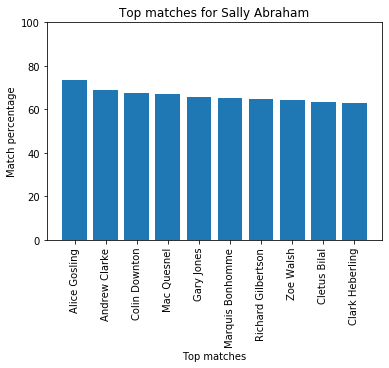

In [22]:
plot_matches(name='Sally Abraham', n=10)

# - Data Visualisation

In this section, we create several data visualistions that will be seen by the user once that person completes the registration form. The aim is to aid understanding of their match percentage and their shared top interests.

* Scores for matching users data visualisation with a possibility to have top three shared interests icons as an overlay over the plot bars.


* Shared interests between the main user and the matched person. Data visualisation for the view of the main user in a form of cluster/nested bars, displaying the interests that have been scored 4 or 5 by the both parties, with focus on the comparison between their levels of interest.


* Shared interests between the main user and the matched person. Data visulaisation for the view of the main user in the form of bars, displaying the means of their interests, with a visual estimate of their difference overlayed on the plot, and with focus on the levels of their shared interests. Displaying the interests that have been scored 3, 4 or 5 by the both parties.

### Top three matching interests
We create functions in order to see the top three matching intersests for a user and its 10 matches.

In [23]:
# Imported the same dataset that has no NaNs, as was confused by the fact that in the Matching algorithm above
# the dataframe was first resolved of missing values and then the dataframe that's worked further on uses just df
# which is different from the one that had the missing values resolved.

df_dv = pd.read_csv("TA_PreData_noNaNs.csv", index_col=[0])

df_dv

,Name,Dancing,Singing,Writing,Meditation,Playing games,Active sports,Being creative,Acting,Cooking,...,Daily events,Celebrities,Science and technology,Future goals,Sharing my past,Dreams,Loneliness,Health,Mental wellbeing,Life struggles
0,Sally Abraham,3.0,3.0,2.0,1.0,5.0,5.0,1.0,2.0,4.0,...,2.0,1.0,4.0,2.0,1.0,4.0,3.0,1.0,3.0,1.0
1,Rebecca Acheson,1.0,1.0,1.0,1.0,4.0,1.0,2.0,2.0,3.0,...,3.0,2.0,3.0,4.0,4.0,3.0,2.0,4.0,4.0,1.0
2,Carole Ackland,5.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,3.0,...,1.0,1.0,2.0,5.0,5.0,1.0,5.0,2.0,4.0,4.0
3,Hayley Alderton,1.0,1.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,...,4.0,2.0,3.0,3.0,5.0,3.0,5.0,1.0,5.0,3.0
4,Nicola Allison,1.0,3.0,1.0,3.0,4.0,1.0,1.0,2.0,4.0,...,3.0,3.0,3.0,5.0,4.0,3.0,3.0,3.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,Caroline Wilks,2.0,3.0,4.0,4.0,5.0,4.0,5.0,5.0,3.0,...,3.0,4.0,3.0,2.0,1.0,3.0,4.0,4.0,3.0,4.0
1006,Roy Martin,5.0,5.0,1.0,1.0,5.0,5.0,1.0,1.0,3.0,...,1.0,1.0,5.0,5.0,4.0,3.0,1.0,3.0,1.0,1.0
1007,Lelia Williams,1.0,2.0,1.0,2.0,3.0,2.0,1.0,2.0,2.0,...,3.0,1.0,3.0,4.0,5.0,3.0,4.0,3.0,2.0,5.0
1008,Lauren Williamson,4.0,1.0,4.0,2.0,5.0,4.0,5.0,5.0,3.0,...,3.0,3.0,5.0,3.0,3.0,3.0,3.0,4.0,4.0,5.0


In [24]:
# Defining a function to get the scores from data for a person = Name

def get_scores(name):
    person = df_dv[df_dv.Name == name]
    assert len(person) == 1
    scores = {k: person[k].iloc[0] for k in person.keys() if k != 'Name'}
    return scores

In [25]:
# Defining a function to get the top three shared interests for my match (name1) & me (name2) 

def get_matching_interests(name1, name2):
    scores1 = get_scores(name1)
    scores2 = get_scores(name2)
    main_interests = [k for k, v in scores1.items() if v == 5.0]
    shared_interests = [k for k in main_interests if scores2[k] in [4.0, 5.0]]
    shared_interests.sort(key=lambda k: -scores2[k])
    if len(shared_interests) >= 3:
        return shared_interests[:3]
    else:
        main_interests = [k for k, v in scores1.items() if v == 4.0]
        shared_interests4 = [k for k in main_interests if scores2[k] in [4.0, 5.0]]
        shared_interests4.sort(key=lambda k: -scores2[k])
        shared_interests.extend(shared_interests4)
        return shared_interests[:3]

In [26]:
# This info will be used to create a graphic where we can see top 3 common interests for matches

get_matching_interests('Lelia Williams', 'Nicola Allison')

['Sharing my past', 'Music', 'Movies']

In [27]:
# Defining a function to see the top 10 matches: names, matching percentage and top three interests 

def get_matches_with_interests(name, n=10):
    match_names, match_distance = find_matches(name=name, print_matches=False, n=n)
    match_to_interests = {}
    for match, distance in zip(match_names, match_distance):
        shared = get_matching_interests(name, match)
        match_score = (1.0 - distance) * 100
        match_to_interests[match] = (match_score, shared)
    return match_to_interests

In [28]:
# Assigning the match info to the variable user_matches
# and giving the name of the person we want to see matches for. 

username = 'Lelia Williams'

user_matches = get_matches_with_interests(username)

user_matches

{'Nicolas Quintana': (76.66039475875304,
  ['Pets', 'Sharing my past', 'Foreign languages']),
 'Stephen Horne': (75.88491943841065,
  ['Foreign languages', 'Sharing my past', 'Pets']),
 'Sharon Drew': (74.21173055484623,
  ['Pets', 'Sharing my past', 'Life struggles']),
 'Karen Maloney': (72.00924287021523,
  ['Pets', 'Foreign languages', 'Sharing my past']),
 'Alison Stock': (71.88739353600967,
  ['Life struggles', 'Pets', 'Foreign languages']),
 'Sharon Thomas': (71.62392062247068,
  ['Pets', 'Foreign languages', 'Sharing my past']),
 'John Armstrong': (71.20596496304448, ['Pets', 'Music', 'Movies']),
 'Joanne Sharp': (70.2736977168359,
  ['Foreign languages', 'Life struggles', 'Pets']),
 'Theresa Ellery': (70.07056058193668,
  ['Pets', 'Foreign languages', 'Life struggles']),
 'Timothy Phillips': (69.99264847453823,
  ['Sharing my past', 'Movies', 'Loneliness'])}

## Main user view : Top ten matched people and their matching scores

Creating a visual for the top ten matched users, based on their similar interests. It dislays the names and the percentage of those that matched with the main user.

In [29]:
# Creating a list with the names of matched people 

names_matched_ppl = list(user_matches.keys())

names_matched_ppl

['Nicolas Quintana',
 'Stephen Horne',
 'Sharon Drew',
 'Karen Maloney',
 'Alison Stock',
 'Sharon Thomas',
 'John Armstrong',
 'Joanne Sharp',
 'Theresa Ellery',
 'Timothy Phillips']

In [30]:
# Creating a list with the matching scores of matched people

scores_matched_ppl = []
for item in user_matches.items():
    scores_matched_ppl.append(item[1][0])
    
scores_matched_ppl

[76.66039475875304,
 75.88491943841065,
 74.21173055484623,
 72.00924287021523,
 71.88739353600967,
 71.62392062247068,
 71.20596496304448,
 70.2736977168359,
 70.07056058193668,
 69.99264847453823]

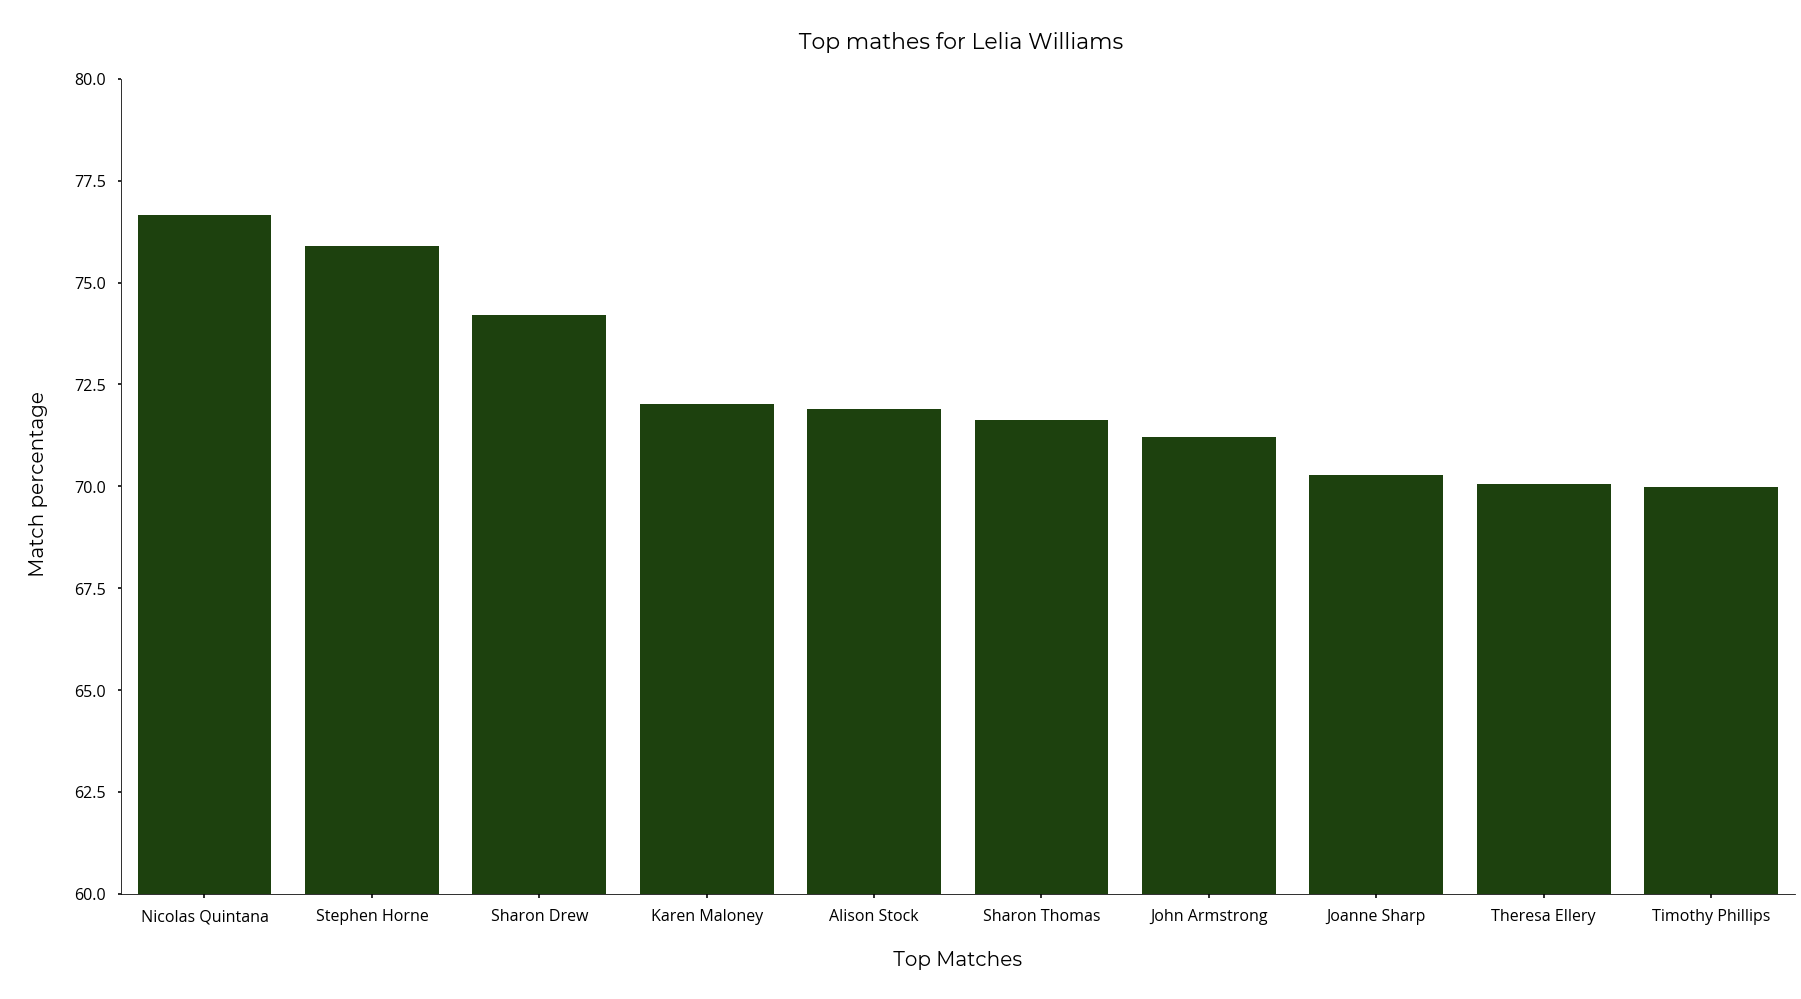

In [31]:
import seaborn as sns

plt.style.use('seaborn-poster')
plt.rcParams.update({'font.family': 'Open Sans', 'font.size': 18})

df_dv_sns = pd.DataFrame(zip(names_matched_ppl, scores_matched_ppl), columns=["matched_names", "matched_scores"])


plt.figure(figsize=(30, 15))
sns.barplot(x='matched_names', y="matched_scores", data=df_dv_sns, color ='#194a05' )
plt.ylim([60, 80])
plt.title('\n Top mathes for ' + username + '\n', fontname='Montserrat', fontsize=22 )
plt.xlabel('\n Top Matches \n', fontname='Montserrat', fontsize=20)
plt.ylabel('\n Match percentage\n', fontname='Montserrat', fontsize=20)
sns.despine()

#plt.savefig('TechLabs_TogetherApart-TopMathes_LeliaWilliams-view.png', dpi=300, pad_inches=0.2)

plt.show()


### Notes

We choose a constant colour (matching the one chosen by the UX and Web Design team) to have good contrast for the overlay elements. Based on the get_matching_interests function, that we created earlier, we will add round icons representing the top three interests for each matched person, on top of each bar of this plot. Doing it here will be a time consuming task.




### Final view with top 3 shared interests represented through icons overlay. Stephen Horne is selected.

![Title](TechLabs_TogetherApart-TopMathes_LeliaWilliams-view-Final.png)

## Main user view : Level of interest for the user and its match

Creating a visual for the matched interests, when the main user is viewing someone else's profile. It dislays the top interests (scored more than 3 (+ equal to, for the second plot) in the linkert scale on the form, where 1=not interested and 5=very interested) shared by both parties.

### Getting the dataframe ready to plot the proposed data visualisation
We create functions, filter and reconstruct a simple (melted) dataframe that contains the relevant information:

* Get indexes for two names from the dataframe, and create a new dataframe with the information related the them. 
* Filter the dataframe to contain only top shared interests, for which both had given 4 or 5 on the form.
* Melt the dataframe, so it contains: user names, interests and their scores.
* Create a bar plot that shows a comparison between the levels of interests for each top category of interest (that we filtered earlier).

##### Get Indexes for two names

In [32]:
# Creating a function to extract the index of the main user and the matched user

df = df_dv

def getIndexes(dfObj, value):
 
    listOfPos = list()

    result = dfObj.isin([value])

    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)
   
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append((row, col))

    return listOfPos

In [33]:
# Finding the indexes of rows

username = 'Lelia Williams'
matched_user = 'Stephen Horne'

listOfPositions = getIndexes(df, username)
 
print('Index positions of ' + username + ' in Dataframe : ')
for i in range(len(listOfPositions)):
    print('Position ', i, ' (Row index , Column Name) : ', listOfPositions[i])

Index positions of Lelia Williams in Dataframe : 
Position  0  (Row index , Column Name) :  (1007, 'Name')


In [34]:
# Fiding the index of the row = matched_user

listOfPositions = getIndexes(df, matched_user)
 
print('Index positions of ' + matched_user + ' in Dataframe : ')
for i in range(len(listOfPositions)):
    print('Position ', i, ' (Row index , Column Name) : ', listOfPositions[i])

Index positions of Stephen Horne in Dataframe : 
Position  0  (Row index , Column Name) :  (934, 'Name')


In [35]:
# Slicing the rows that we need

df_match_profile = df.iloc[[1007,934],:]

df_match_profile

,Name,Dancing,Singing,Writing,Meditation,Playing games,Active sports,Being creative,Acting,Cooking,...,Daily events,Celebrities,Science and technology,Future goals,Sharing my past,Dreams,Loneliness,Health,Mental wellbeing,Life struggles
1007,Lelia Williams,1.0,2.0,1.0,2.0,3.0,2.0,1.0,2.0,2.0,...,3.0,1.0,3.0,4.0,5.0,3.0,4.0,3.0,2.0,5.0
934,Stephen Horne,1.0,1.0,1.0,1.0,5.0,2.0,2.0,2.0,2.0,...,2.0,1.0,2.0,4.0,5.0,3.0,2.0,2.0,4.0,3.0


In [36]:
# Filtering to have a dataframe with the top interests for both

def is_shared(k):
    col = df_match_profile[k]
    assert len(col) == 2
    return (col.iloc[0] > 3 and col.iloc[1] > 3)

shared_interests = [k for k in df_match_profile.keys() if k == 'Name' or is_shared(k)]
df_match_profile_shared = df_match_profile[shared_interests]
df_match_profile_shared


,Name,Pets,Music,Movies,Reading,Foreign languages,Future goals,Sharing my past
1007,Lelia Williams,5.0,4.0,4.0,4.0,5.0,4.0,5.0
934,Stephen Horne,4.0,5.0,5.0,4.0,5.0,4.0,5.0


In [37]:
# Melting the dataframe to get it ready for plotting

df_top_int = df_match_profile_shared.melt(id_vars=['Name'], var_name='int_name', value_name='int_score')

df_top_int

,Name,int_name,int_score
0,Lelia Williams,Pets,5.0
1,Stephen Horne,Pets,4.0
2,Lelia Williams,Music,4.0
3,Stephen Horne,Music,5.0
4,Lelia Williams,Movies,4.0
5,Stephen Horne,Movies,5.0
6,Lelia Williams,Reading,4.0
7,Stephen Horne,Reading,4.0
8,Lelia Williams,Foreign languages,5.0
9,Stephen Horne,Foreign languages,5.0


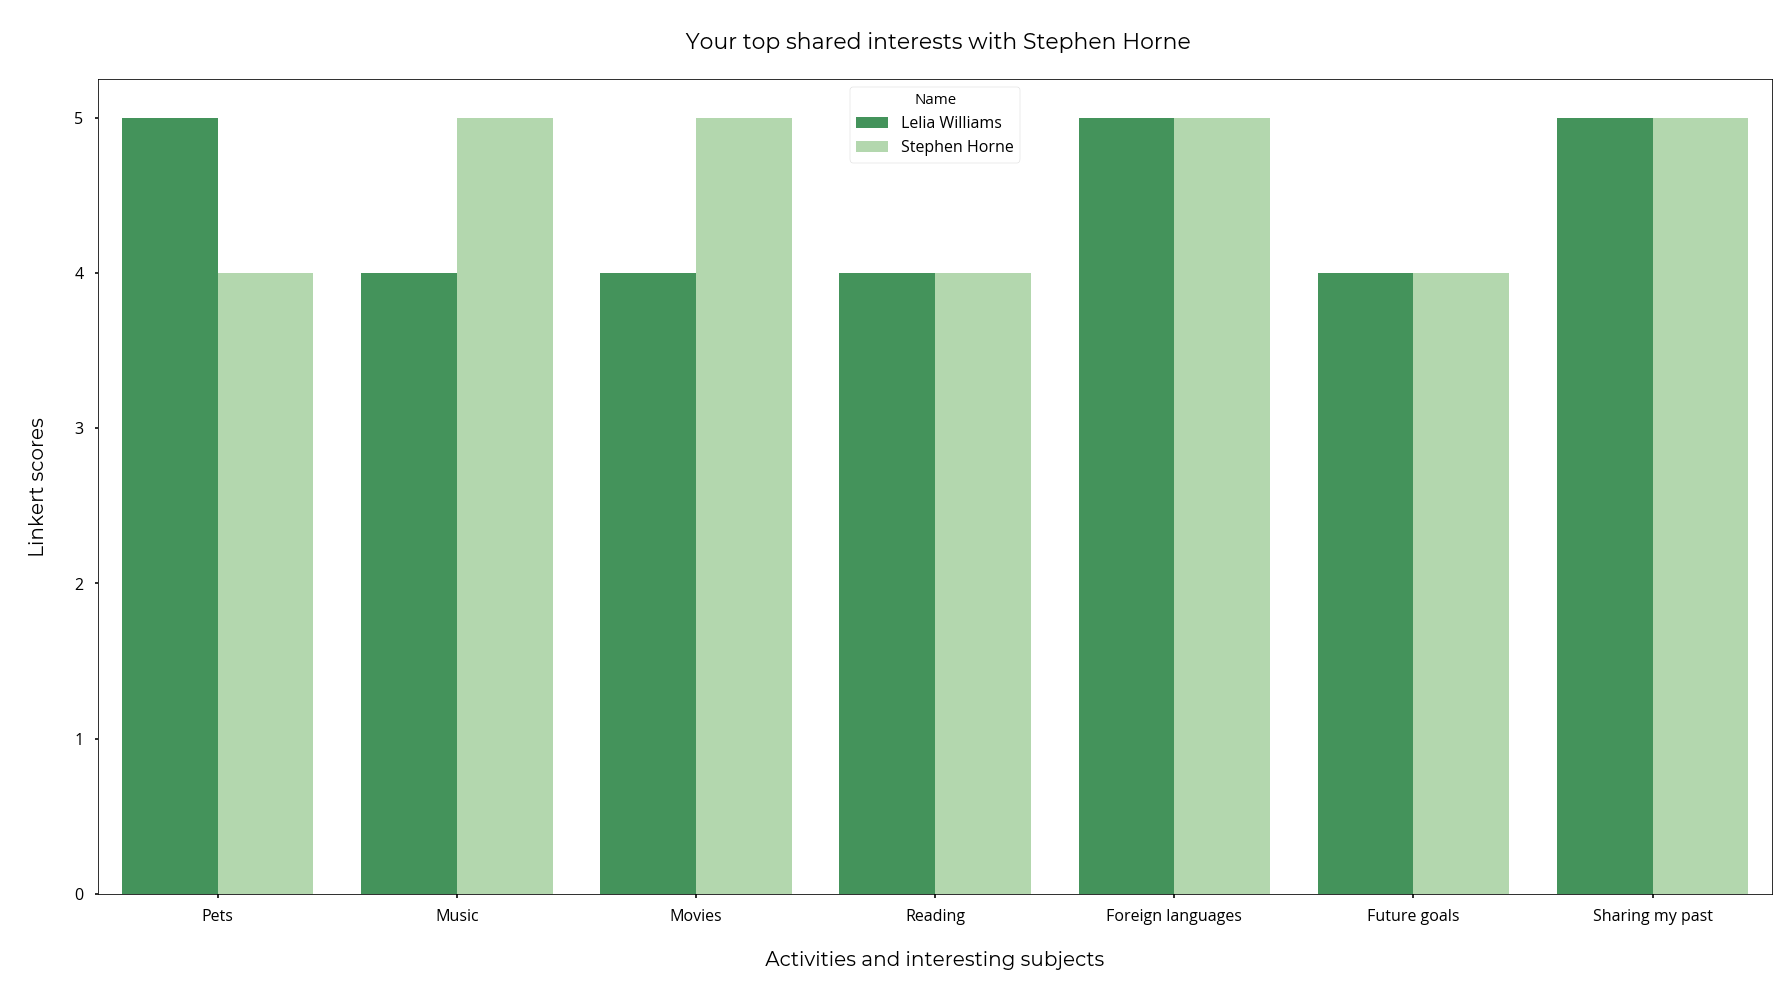

In [38]:
# Creating the plot with nested bars corresponding to top shared interests

plt.style.use('seaborn-poster')
plt.rcParams.update({'font.family': 'Open Sans', 'font.size': 18})
color = sns.color_palette("Greens_r", 2)

plt.figure(figsize=(30, 15))
sns.barplot(x='int_name', y='int_score', hue='Name', data=df_top_int, palette=color)
plt.title('\n Your top shared interests with ' + matched_user + '\n', fontname='Montserrat', fontsize=22 )
plt.xlabel('\n Activities and interesting subjects \n', fontname='Montserrat', fontsize=20)
plt.ylabel('\n Linkert scores \n', fontname='Montserrat', fontsize=20)

#plt.savefig('TechLabs_TogetherApart-TopInterests-nested_LeliaWilliams-view-StephenHorne-match.png', dpi=300, pad_inches=0.2)

plt.show()

### Creating an alternative, wider view of the shared interests
Here, we change the filtering of the dataset (for shared interests that both had scored as 3, 4 or 5), and plotting features to suit the second type of bar plot.

In [39]:
# Filtering to have a wider dataframe with the top interests for both

def is_shared3(k):
    col = df_match_profile[k]
    assert len(col) == 2
    return (col.iloc[0] >= 3 and col.iloc[1] >= 3)

shared_interests3 = [k for k in df_match_profile.keys() if k == 'Name' or is_shared3(k)]
df_match_profile_shared3 = df_match_profile[shared_interests3]
df_match_profile_shared3

df_top_int3 = df_match_profile_shared3.melt(id_vars=['Name'], var_name='int_name', value_name='int_score')

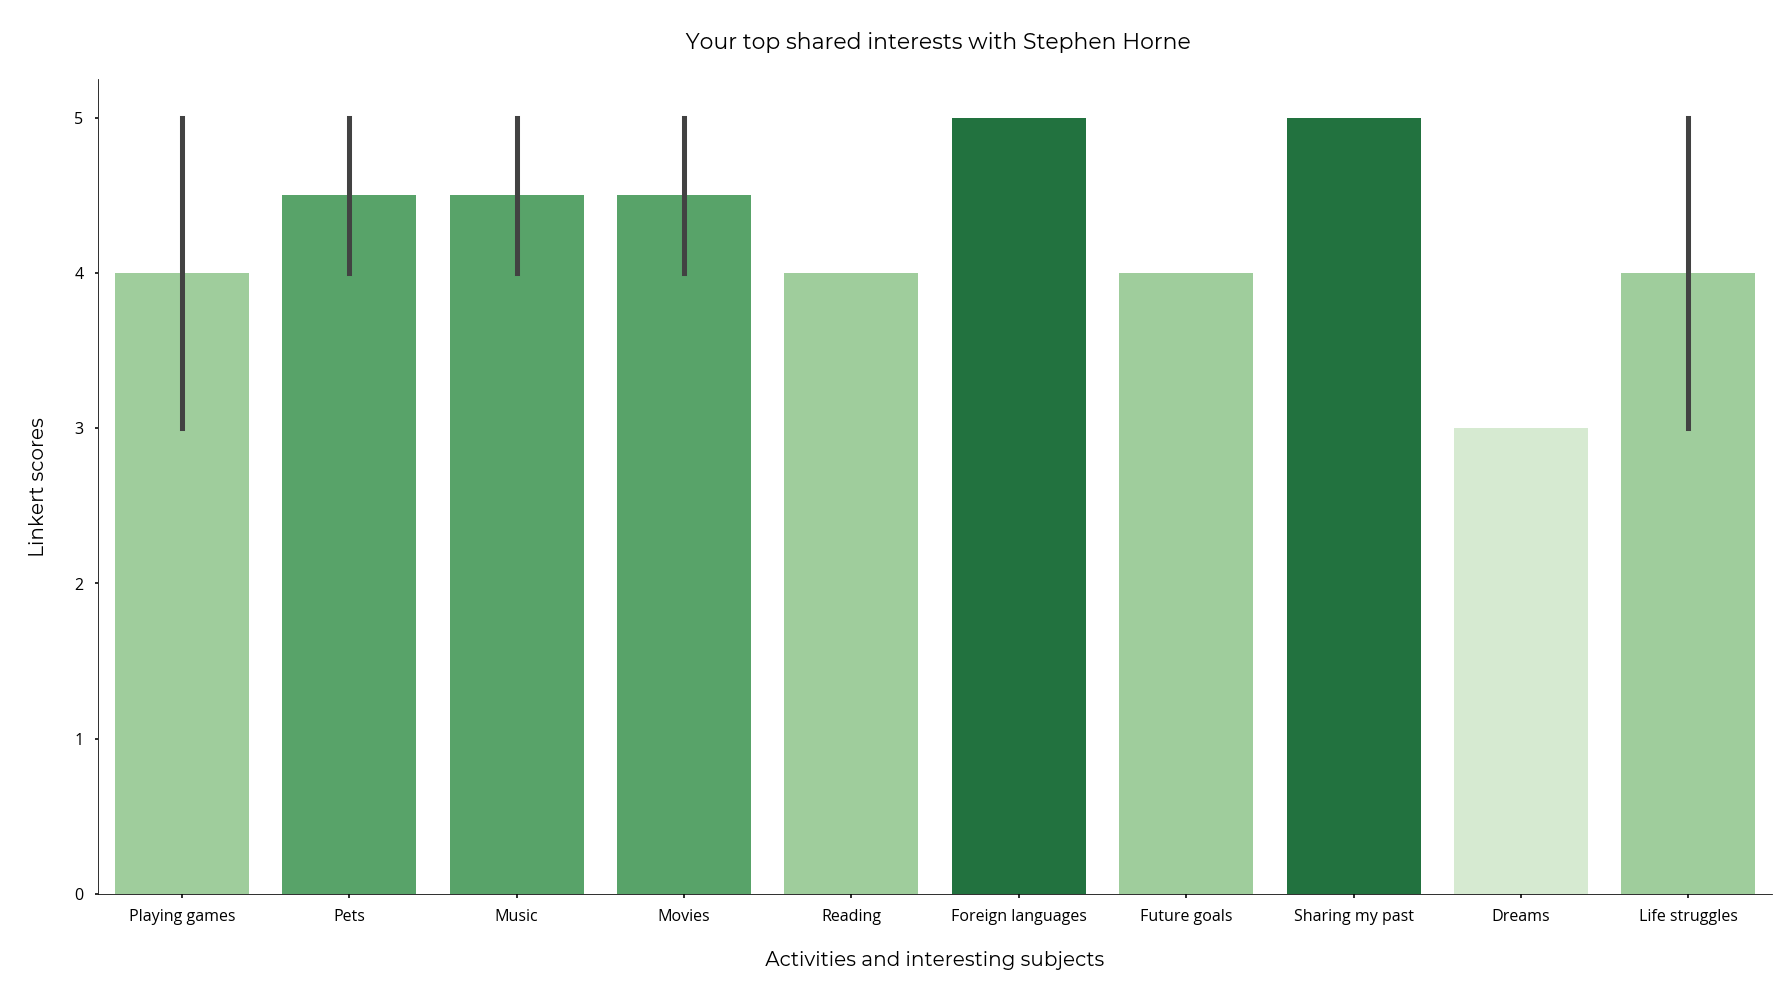

In [40]:
# Creating the plot with nested bars corresponding to top shared interests

plt.style.use('seaborn-poster')
plt.rcParams.update({'font.family': 'Open Sans', 'font.size': 18})

height = df_match_profile_shared3.mean()
unique_heights = sorted(df_match_profile_shared3.mean().unique())
#unique_heights.reverse()
color = sns.color_palette("Greens", len(unique_heights))
colors = []
for h in height.values:
    rank = unique_heights.index(h)
    colors.append(color[rank])
colors

f, ax = plt.subplots(figsize=(30, 15))
sns.barplot(x='int_name', y='int_score', data=df_top_int3, palette=colors, ax=ax)
ax.set_title('\n Your top shared interests with ' + matched_user + '\n', fontname='Montserrat', fontsize=22 )
ax.set_xlabel('\n Activities and interesting subjects \n', fontname='Montserrat', fontsize=20)
ax.set_ylabel('\n Linkert scores \n', fontname='Montserrat', fontsize=20)
sns.despine()

#plt.savefig('TechLabs_TogetherApart-TopInterests-estimate_LeliaWilliams-view-StephenHorne-match.png', dpi=300, pad_inches=0.2)

plt.show()
 

#### Notes

We could add some mock data such as dates to form an overview of the flux of users that have registered for Together Apart, for the developers team, but we think what we have achieved so far is enough for the purpose of TechLabs challenge. 